In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

# 1. 資料準備

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [ ]:
y_train_label=y_train_label.reshape(-1)
y_test_label=y_test_label.reshape(-1)

In [ ]:
x_train_normalize = x_train_image.astype('float32') / 255.0
x_test_normalize = x_test_image.astype('float32') / 255.0

In [ ]:
from tensorflow.keras import utils
y_train_onehot = utils.to_categorical(y_train_label)
y_test_onehot = utils.to_categorical(y_test_label)

In [ ]:
print("train data:",'images:',x_train_normalize.shape," labels:",y_train_onehot.shape) 
print("test  data:",'images:',x_test_normalize.shape ," labels:",y_test_onehot.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 10)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 10)


In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
        "dog","frog","horse","ship","truck"]

# 建立模型

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten,Conv2D,Softmax
from tensorflow.keras import Input,Model

In [ ]:
class CNN_Model(tf.keras.Model):
  def __init__(self):
    super(CNN_Model, self).__init__(name='CNN_Model')
    self.conv1 = Conv2D(filters=32, kernel_size=(5,5),
               padding='same',activation='relu')
    self.max_pool1 = MaxPooling2D(pool_size=(2, 2))
    self.conv2 = Conv2D(filters=64, kernel_size=(5,5),
               padding='same',activation='relu')
    self.max_pool2 = MaxPooling2D(pool_size=(2, 2))
    self.flatten = Flatten()
    self.fc1 = Dense(750, activation='relu')
    self.dropout = Dropout(0.5)
    self.out_layer = Dense(10)
    self.softmax = Softmax()
  def call(self, x):
    x = self.conv1(x)  
    x = self.max_pool1(x)
    x = self.conv2(x)      
    x = self.max_pool2(x)
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.dropout(x)
    x = self.out_layer(x)
    x = self.softmax(x)
    return x


In [ ]:
model = CNN_Model()

In [ ]:
model.build(input_shape=(None, 32,32,3))

In [ ]:
print(model.summary())

Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  2432      
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  51264     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  30

# 訓練模型

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])

In [ ]:
train_history=model.fit(
    x=x_train_normalize,y=y_train_onehot,
    validation_split=0.2,batch_size=200,epochs=10,verbose=2)       

Epoch 1/10
200/200 - 13s - loss: 1.6593 - acc: 0.4002 - val_loss: 1.3087 - val_acc: 0.5403 - 13s/epoch - 67ms/step
Epoch 2/10
200/200 - 2s - loss: 1.2379 - acc: 0.5573 - val_loss: 1.1193 - val_acc: 0.6091 - 2s/epoch - 10ms/step
Epoch 3/10
200/200 - 2s - loss: 1.0732 - acc: 0.6216 - val_loss: 1.0056 - val_acc: 0.6548 - 2s/epoch - 10ms/step
Epoch 4/10
200/200 - 2s - loss: 0.9518 - acc: 0.6657 - val_loss: 0.9332 - val_acc: 0.6780 - 2s/epoch - 10ms/step
Epoch 5/10
200/200 - 2s - loss: 0.8572 - acc: 0.6986 - val_loss: 0.8903 - val_acc: 0.6917 - 2s/epoch - 10ms/step
Epoch 6/10
200/200 - 2s - loss: 0.7822 - acc: 0.7268 - val_loss: 0.8408 - val_acc: 0.7113 - 2s/epoch - 10ms/step
Epoch 7/10
200/200 - 2s - loss: 0.7061 - acc: 0.7515 - val_loss: 0.8490 - val_acc: 0.7135 - 2s/epoch - 10ms/step
Epoch 8/10
200/200 - 2s - loss: 0.6348 - acc: 0.7773 - val_loss: 0.8487 - val_acc: 0.7099 - 2s/epoch - 10ms/step
Epoch 9/10
200/200 - 2s - loss: 0.5762 - acc: 0.7967 - val_loss: 0.8323 - val_acc: 0.7256 - 2s

In [ ]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train_key,valid_key):
    plt.plot(train_history.history[train_key],'--')
    plt.plot(train_history.history[valid_key])
    plt.title('Train History')
    plt.ylabel(train_key)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

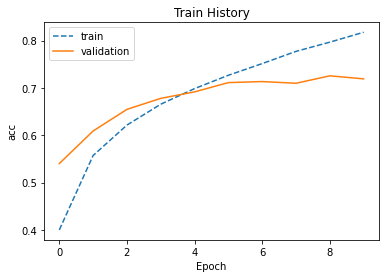

In [ ]:
show_train_history(train_history,'acc','val_acc')

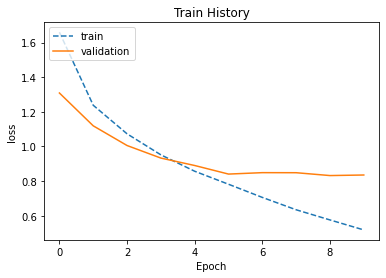

In [ ]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [ ]:
scores = model.evaluate(x_test_normalize, y_test_onehot,verbose=2)

313/313 - 1s - loss: 0.8350 - acc: 0.7183 - 1s/epoch - 4ms/step


In [ ]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.8350404500961304 test_acc= 0.7182999849319458


# 進行預測

In [ ]:
probability = model.predict(x_test_normalize)

In [ ]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [ ]:
prediction

array([3, 1, 0, ..., 5, 4, 7])

# 查看預測結果

In [ ]:
import matplotlib.pyplot as plt 

In [ ]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
      5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [ ]:
def plot_images_labels_prediction(
    images,labels,prediction,idx,num=10):
    fig = plt.gcf().set_size_inches(12, 12)    
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= str(idx)+',' +label_dict[labels[idx]]
        if len(prediction)>0:
            title+="=>"+label_dict[prediction[idx]]
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

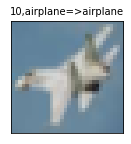

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=1)

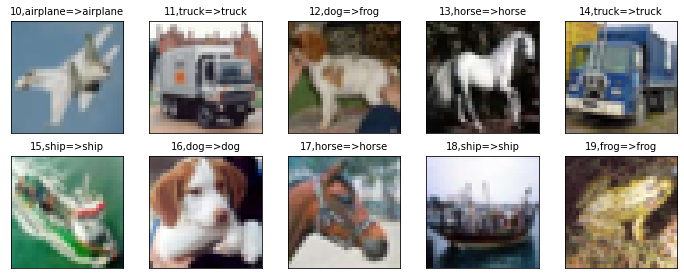

In [ ]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=10,num=10)

# 查看預測機率

In [ ]:
def show_predicted_probability(
    images,labels,prediction,probability,idx):
  plt.figure(figsize=(1,1));
  plt.xticks([]);plt.yticks([])
  plt.imshow(images[idx],cmap='binary') 
  plt.show()
  if len(labels)>0:print('label:',label_dict[labels[idx]])
  if len(prediction)>0:print('predict:',label_dict[prediction[idx]])
  for i in range(10):
    print('%-10s Probability:%.9f'%(label_dict[i],probability[idx][i]))     

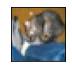

label: cat
predict: cat
airplane   Probability:0.003279106
automobile Probability:0.001003714
bird       Probability:0.002923511
cat        Probability:0.797317147
deer       Probability:0.000259497
dog        Probability:0.146463111
frog       Probability:0.008605983
horse      Probability:0.000936021
ship       Probability:0.038500637
truck      Probability:0.000711226


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,0) 

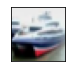

label: ship
predict: automobile
airplane   Probability:0.000151884
automobile Probability:0.753816485
bird       Probability:0.000000001
cat        Probability:0.000000000
deer       Probability:0.000000000
dog        Probability:0.000000000
frog       Probability:0.000000002
horse      Probability:0.000000000
ship       Probability:0.246001795
truck      Probability:0.000029830


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,1) 

# confusion matrix

In [ ]:
import pandas as pd

In [ ]:
cm=pd.crosstab(index=y_test_label,columns=prediction,
       rownames=['label'],colnames=['predict'])

In [ ]:
cm

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,739,15,87,16,13,4,12,12,61,41
1,24,831,11,8,2,3,12,2,21,86
2,37,4,718,50,55,36,43,36,12,9
3,23,6,147,503,53,122,72,53,10,11
4,20,3,114,63,629,24,49,85,9,4
5,15,1,104,183,40,532,32,80,7,6
6,8,1,74,52,25,18,798,13,4,7
7,16,1,48,23,42,27,3,829,1,10
8,57,46,39,9,8,5,4,3,807,22


#heapmap cm

In [ ]:
import numpy as np

In [ ]:
cm_mat=cm.to_numpy()

In [ ]:
cm_mat

array([[739,  15,  87,  16,  13,   4,  12,  12,  61,  41],
       [ 24, 831,  11,   8,   2,   3,  12,   2,  21,  86],
       [ 37,   4, 718,  50,  55,  36,  43,  36,  12,   9],
       [ 23,   6, 147, 503,  53, 122,  72,  53,  10,  11],
       [ 20,   3, 114,  63, 629,  24,  49,  85,   9,   4],
       [ 15,   1, 104, 183,  40, 532,  32,  80,   7,   6],
       [  8,   1,  74,  52,  25,  18, 798,  13,   4,   7],
       [ 16,   1,  48,  23,  42,  27,   3, 829,   1,  10],
       [ 57,  46,  39,   9,   8,   5,   4,   3, 807,  22],
       [ 25,  89,  22,  14,   3,   6,   9,  20,  15, 797]])

In [ ]:
cm_mat.sum(axis=0)

array([ 964,  997, 1364,  921,  870,  777, 1034, 1133,  947,  993])

In [ ]:
cm_mat.sum(axis=1)[:, np.newaxis]

array([[1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000],
       [1000]])

In [ ]:
cm_norm = np.around(
    cm_mat.astype('float') / 
    cm_mat.sum(axis=1)[:, np.newaxis], 
    decimals=3)

In [ ]:
cm_norm

array([[0.739, 0.015, 0.087, 0.016, 0.013, 0.004, 0.012, 0.012, 0.061,
        0.041],
       [0.024, 0.831, 0.011, 0.008, 0.002, 0.003, 0.012, 0.002, 0.021,
        0.086],
       [0.037, 0.004, 0.718, 0.05 , 0.055, 0.036, 0.043, 0.036, 0.012,
        0.009],
       [0.023, 0.006, 0.147, 0.503, 0.053, 0.122, 0.072, 0.053, 0.01 ,
        0.011],
       [0.02 , 0.003, 0.114, 0.063, 0.629, 0.024, 0.049, 0.085, 0.009,
        0.004],
       [0.015, 0.001, 0.104, 0.183, 0.04 , 0.532, 0.032, 0.08 , 0.007,
        0.006],
       [0.008, 0.001, 0.074, 0.052, 0.025, 0.018, 0.798, 0.013, 0.004,
        0.007],
       [0.016, 0.001, 0.048, 0.023, 0.042, 0.027, 0.003, 0.829, 0.001,
        0.01 ],
       [0.057, 0.046, 0.039, 0.009, 0.008, 0.005, 0.004, 0.003, 0.807,
        0.022],
       [0.025, 0.089, 0.022, 0.014, 0.003, 0.006, 0.009, 0.02 , 0.015,
        0.797]])

In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
        "dog","frog","horse","ship","truck"]
cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)

In [ ]:
cm_df

,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
airplane,0.739,0.015,0.087,0.016,0.013,0.004,0.012,0.012,0.061,0.041
automobile,0.024,0.831,0.011,0.008,0.002,0.003,0.012,0.002,0.021,0.086
bird,0.037,0.004,0.718,0.050,0.055,0.036,0.043,0.036,0.012,0.009
cat,0.023,0.006,0.147,0.503,0.053,0.122,0.072,0.053,0.010,0.011
deer,0.020,0.003,0.114,0.063,0.629,0.024,0.049,0.085,0.009,0.004
dog,0.015,0.001,0.104,0.183,0.040,0.532,0.032,0.080,0.007,0.006
frog,0.008,0.001,0.074,0.052,0.025,0.018,0.798,0.013,0.004,0.007
horse,0.016,0.001,0.048,0.023,0.042,0.027,0.003,0.829,0.001,0.010
ship,0.057,0.046,0.039,0.009,0.008,0.005,0.004,0.003,0.807,0.022
truck,0.025,0.089,0.022,0.014,0.003,0.006,0.009,0.020,0.015,0.797


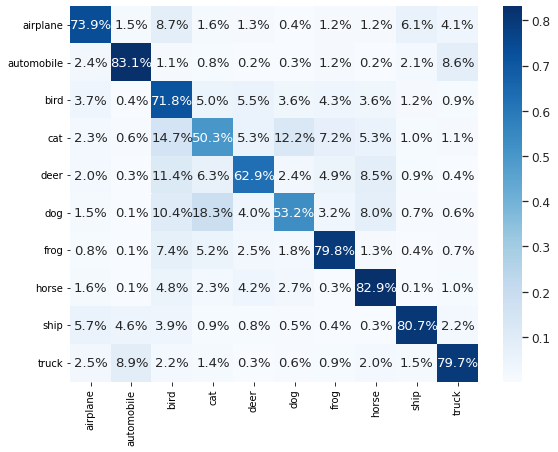

In [ ]:
import seaborn as sns
figure = plt.figure(figsize=(8, 6))
plt.ylabel('Label')
plt.xlabel('Predicted')
plt.tight_layout()
sns.set(font_scale=1.1)
sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
plt.show()

#CF function

In [ ]:
class_names =["airplane","automobile","bird","cat","deer",
       "dog","frog","horse","ship","truck"]
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def plot_heatmap_confusion_matrix(cm_np):
  cm_norm = np.around(
      cm_np.astype('float') / 
      cm_np.sum(axis=1)[:, np.newaxis],decimals=3)
  cm_df = pd.DataFrame(cm_norm,index = class_names,columns = class_names)
  figure = plt.figure(figsize=(8, 6))
  plt.tight_layout();sns.set(font_scale=1)
  plt.ylabel('Label');plt.xlabel('Predicted')
  sns.heatmap(cm_df, annot=True,cmap=plt.cm.Blues,fmt='.1%')
  return figure

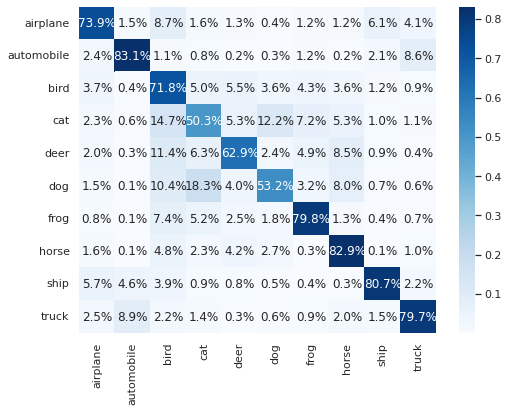

In [ ]:
figure = plot_heatmap_confusion_matrix(cm.to_numpy())

In [ ]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})

In [ ]:
df[:5]

,label,predict
0,3,3
1,8,1
2,8,0
3,0,0
4,6,4


In [ ]:
df[(df.label==5)&(df.predict==3)]

,label,predict
128,5,3
158,5,3
178,5,3
238,5,3
321,5,3
...,...,...
9654,5,3
9657,5,3
9798,5,3
9823,5,3


# 查看預測錯誤資料

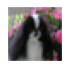

label: dog
predict: horse
airplane   Probability:0.000369778
automobile Probability:0.000101031
bird       Probability:0.017287847
cat        Probability:0.016254356
deer       Probability:0.000051790
dog        Probability:0.043744706
frog       Probability:0.000004068
horse      Probability:0.917750418
ship       Probability:0.000009293
truck      Probability:0.004426622


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,42)

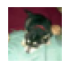

label: dog
predict: cat
airplane   Probability:0.004300396
automobile Probability:0.007710527
bird       Probability:0.005337053
cat        Probability:0.538980901
deer       Probability:0.000839087
dog        Probability:0.092543200
frog       Probability:0.348698705
horse      Probability:0.000511466
ship       Probability:0.000968736
truck      Probability:0.000109923


In [ ]:
show_predicted_probability(x_test_image,y_test_label,prediction,probability,128)

#建立儲存模型路徑

In [ ]:
!mkdir -p Model/CifarCNNSub 

In [ ]:
ls -l Model

total 4
drwxr-xr-x 2 root root 4096 May 30 02:52 CifarCNNSub/



# Model subclassing API不能儲存整個模型 (HDF5)


In [ ]:
#model.save("Model/CifarCNNSub/whole.h5",
#           save_format='h5',
#           overwrite=True)
#print("Save model whole") 

查看檔案

#匯出為SavedModel格式(Export to SavedModel)

In [ ]:
model.save("Model/CifarCNNSub/SavedModel",save_format='tf')
print("Save model to SavedModel")

INFO:tensorflow:Assets written to: Model/CifarCNNSub/SavedModel/assets
Save model to SavedModel


查看檔案

In [ ]:
ls -l Model/CifarCNNSub 

total 4
drwxr-xr-x 4 root root 4096 May 30 02:52 SavedModel/


In [ ]:
ls -l Model/CifarCNNSub/SavedModel 

total 156
drwxr-xr-x 2 root root   4096 May 30 02:52 assets/
-rw-r--r-- 1 root root   8721 May 30 02:52 keras_metadata.pb
-rw-r--r-- 1 root root 139135 May 30 02:52 saved_model.pb
drwxr-xr-x 2 root root   4096 May 30 02:52 variables/


# Model subclassing API 不能不能儲存模型結構

使用model.to_json()儲存模型結構

In [ ]:
#model_json = model.to_json()

In [ ]:
#print(model_json) 

In [ ]:
#with open("Model/CifarCNNSub/structure.json", "w") as json_file:
#    json_file.write(model_json)
#    print("Save model structure")

In [ ]:
#model.save("Model/CifarCNN/whole.h5",
#           save_format='h5',
#           overwrite=True)
#print("Save model whole") 

In [ ]:
#ls -l Model/CifarCNNSub

使用model.save_weights()儲存模型weight

In [ ]:
model.save_weights("Model/CifarCNNSub/weight.h5") 
print("Save model weight")

Save model weight


In [ ]:
ls -l Model/CifarCNNSub

total 12272
drwxr-xr-x 4 root root     4096 May 30 02:52 SavedModel/
-rw-r--r-- 1 root root 12559640 May 30 02:52 weight.h5


#掛載google個人雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#查看google個人雲端硬碟內容

In [ ]:
ls -l drive/MyDrive

total 28
drwx------ 2 root root 4096 Mar 21 02:32  BK/
drwx------ 2 root root 4096 Feb 22  2019 'Colab Notebooks'/
drwx------ 2 root root 4096 Jun 29  2021  Model/
drwx------ 2 root root 4096 May 21 05:32  MP21924_example/
drwx------ 2 root root 4096 May 29 12:39  MP21924_example_fit/
drwx------ 2 root root 4096 May 10 03:00  MP21924_example_installed/
drwx------ 2 root root 4096 May 21 05:32  MP21924_example_O/


複製虛擬機  目錄===>至雲端硬碟

In [ ]:
!cp -r Model drive/MyDrive

In [ ]:
ls -l drive/MyDrive

total 16
drwx------ 5 root root 4096 Mar 21 02:32  BK/
drwx------ 2 root root 4096 Feb 22  2019 'Colab Notebooks'/
drwx------ 5 root root 4096 Jun 29  2021  Model/
drwx------ 2 root root 4096 May 21 05:32  MP21924_example/


In [ ]:
ls -l drive/MyDrive/Model

total 16038
-rw------- 1 root root 16410384 Mar 12 05:57 Cifar_C5P1_ErAuBn.h5
drwx------ 2 root root     4096 Jun 29  2021 CifarCNN/
drwx------ 2 root root     4096 Feb  2 14:35 CifarCNNFunc/
drwx------ 3 root root     4096 May 30 02:53 CifarCNNSub/


In [ ]:
ls -l drive/MyDrive/Model/CifarCNNSub

total 12270
drwx------ 4 root root     4096 May 30 02:53 SavedModel/
-rw------- 1 root root 12559640 May 30 02:53 weight.h5
